In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [ ]:
df = pd.read_csv('dataset3.psv', sep='|')

In [ ]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1.0,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2.0,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1.0,45,3.0,2,0,73.0,0


In [ ]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,49962.000000,54808.000000,50684.000000,54808.000000,54808.000000,47350.000000,54808.000000
mean,39195.830627,1.256475,273.521530,3.329256,5.865512,0.023172,63.514213,0.085170
std,22586.581449,0.612734,5422.563711,1.259993,4.265094,0.150450,13.492071,0.279137
min,1.000000,1.000000,-32.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,123456.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0    employee_id          54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       49962 non-null  float64
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    47350 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 5.4+ MB


# Limpando as colunas

In [ ]:
df.gender.unique()


array(['f', 'm', 'MALE', 'fEMALE', 'eu sou homem hetero homossexual!'],
      dtype=object)

In [ ]:
df['gender'].replace('MALE', 'm', inplace=True)
df['gender'].replace('fEMALE', 'f', inplace=True)
df['gender'].replace('eu sou homem hetero homossexual!', 'm', inplace=True)

In [ ]:
df.gender.unique()


array(['f', 'm'], dtype=object)

In [ ]:
df.region.unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18',
       'casa da lu na suecia'], dtype=object)

In [ ]:
df = df[df['region'] != 'casa da lu na suecia']

In [ ]:
df.region.unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [ ]:
df.age.unique()

array([    35,     30,     34,     39,     45,     31,     33,     28,
           32,     49,     37,     38,     41,     27,     29,     26,
           24,     57,     40,     42,     23,     59,     44,     50,
           56,     20,     25,     47,     36,     46,     60,     43,
           22,     54,     58, 123456,     48,     53,     55,     51,
           52,     21,    -32])

In [ ]:
df = df[df['age'] != 123456]
df = df[df['age'] != -32]

In [ ]:
df.age.unique()

array([35, 30, 34, 39, 45, 31, 33, 28, 32, 49, 37, 38, 41, 27, 29, 26, 24,
       57, 40, 42, 23, 59, 44, 50, 56, 20, 25, 47, 36, 46, 60, 43, 22, 54,
       58, 48, 53, 55, 51, 52, 21])

In [ ]:
df.rename(columns={'awards_won?': 'awards_won'}, inplace=True)


In [ ]:
df.department.unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal',
       'quem trouxe quenga'], dtype=object)

In [ ]:
df = df[df['department'] != 'quem trouxe quenga']

In [ ]:
df.education.unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [ ]:
salario_igual_10 = df.loc[df['education'].isnull()]

In [ ]:
salario_igual_10.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1.0,30,NaN,1,0,77.0,0
21,33332,Operations,region_15,NaN,m,sourcing,1.0,41,4.0,11,0,57.0,0
32,35465,Sales & Marketing,region_7,NaN,f,sourcing,1.0,24,1.0,2,0,48.0,0
43,17423,Sales & Marketing,region_2,NaN,m,other,3.0,24,2.0,2,0,48.0,0
82,66013,Sales & Marketing,region_2,NaN,m,sourcing,2.0,25,3.0,2,0,53.0,0


In [ ]:
contagem_ocorrencias = df['education'].value_counts()

In [ ]:
contagem_ocorrencias

Bachelor's          36644
Master's & above    14921
Below Secondary       696
Name: education, dtype: int64

In [ ]:
df['education'] = df['education'].fillna("Bachelor's")


In [ ]:
contagem = df['no_of_trainings'].value_counts()
contagem

1.0     40260
2.0      7321
3.0      1647
4.0       438
5.0       121
6.0        40
7.0        10
9.0         5
8.0         4
10.0        4
Name: no_of_trainings, dtype: int64

In [ ]:
df['no_of_trainings'] = df['no_of_trainings'].fillna(1)


In [ ]:
contagem2 = df['previous_year_rating'].value_counts()
contagem2


3.0    18576
5.0    11721
4.0     9860
1.0     6216
2.0     4220
Name: previous_year_rating, dtype: int64

In [ ]:
media = df['previous_year_rating'].mean()
df['previous_year_rating'] = df['previous_year_rating'].fillna(media)

In [ ]:
media = df['avg_training_score'].mean()
df['avg_training_score'] = df['avg_training_score'].fillna(media)

# Análise dos dados

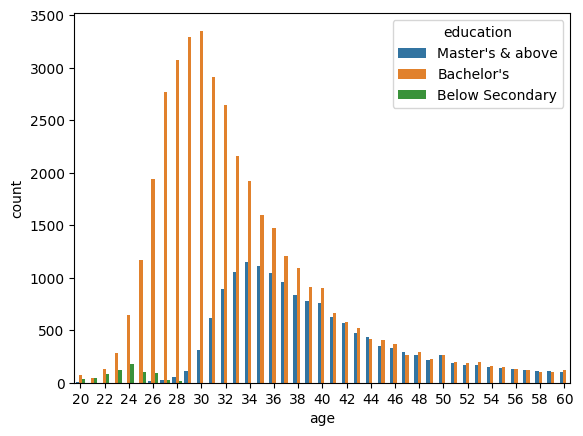

In [ ]:
ax = sns.countplot(x='age', hue='education', data=df)
ax.xaxis.set_major_locator(mticker.MultipleLocator(2))

plt.show()

## Podemos observar que as pessoas mais velhas tendem a ter maior grau de escolaridade.29 e 30 anos são as idades em que há mais pessoas com graduação.

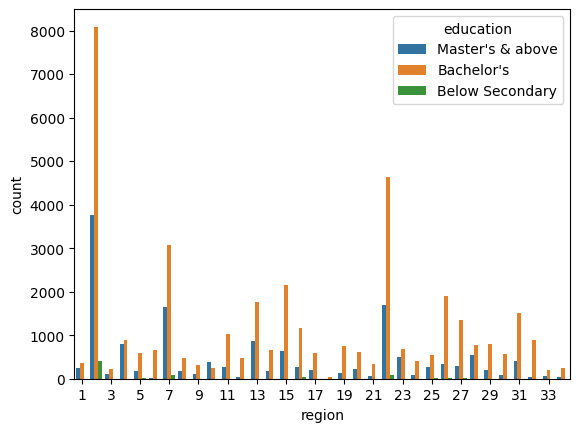

In [ ]:
ax = sns.countplot(x='region', hue='education', data=df_auxiliar)
ax.xaxis.set_major_locator(mticker.MultipleLocator(2))

plt.show()

## Conseguimos notar que habitantes de diferentes regiões possuem escolaridade média diferentes. Tal fato pode estar relacionado com as oportunidades e renda de cada região.

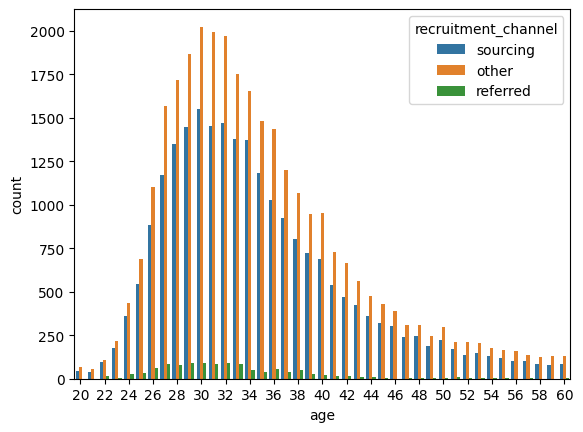

In [ ]:
ax = sns.countplot(x='age', hue='recruitment_channel', data=df)
ax.xaxis.set_major_locator(mticker.MultipleLocator(2))

plt.show()

## Vemos que contratações por indicações ocorrem geralmente na faixa entre 24 e 38 anos e provavelmente para cargos baixos ou intermediários. Além disso, o número relativo de contratações por entrevistas(sourcing) tende a aumentar a partir dos 30 anos.

(array([28185., 12490.,   999.,  9568.,  3428.]),
 array([0. , 1.6, 3.2, 4.8, 6.4, 8. ]),
 <BarContainer object of 5 artists>)

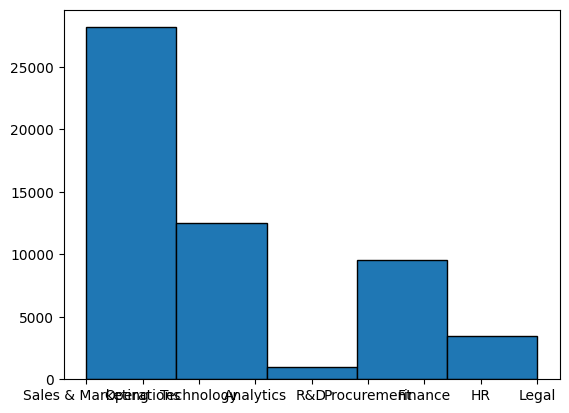

In [ ]:
plt.hist(df['department'], bins=5, edgecolor='black')

## Podemos ver que a quantidade de funcionarios é diferente para cada setor e isso pode estar relacionado com a probabilidade de promoção, pois pode haver menos oportunidade a depender do departamento.

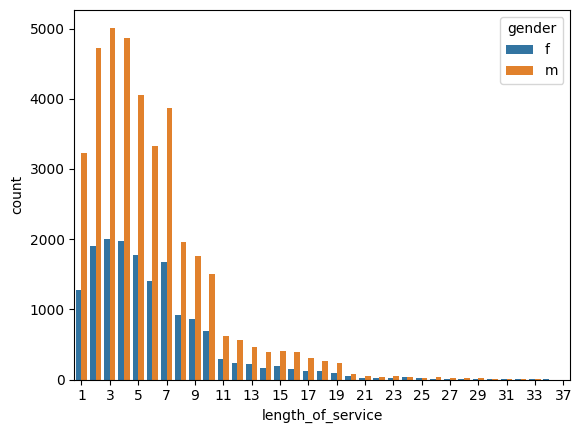

In [ ]:
ax = sns.countplot(x='length_of_service', hue='gender', data=df)
ax.xaxis.set_major_locator(mticker.MultipleLocator(2))

plt.show()

## Podemos ver que há mais homens que mulheres na empresa e não tem grandes diferenças em relação ao tempo de permanencia na empresa por sexo, pois os gráficos para homens e mulheres têm formas semelhantes

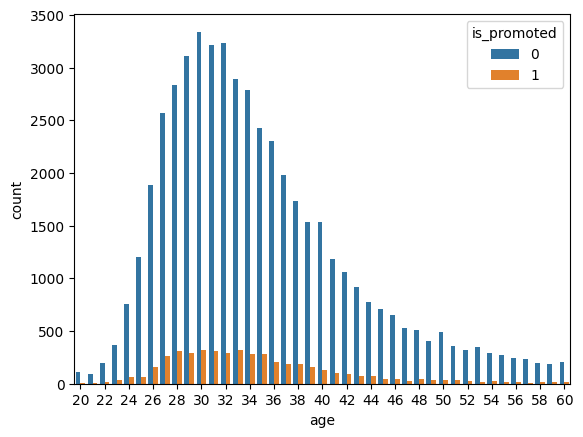

In [ ]:
ax = sns.countplot(x='age', hue='is_promoted', data=df)
ax.xaxis.set_major_locator(mticker.MultipleLocator(2))

plt.show()

## Notamos que, em geral, o número de não promovidos é bem maior que o de promovidos. Contudo, notamos que há mais promoção entre os 26 e 38 anos, talvez por serem mais jovens, não estarem em cargos de gerência e ficarem mais tempo na empresa antes da aposentadoria.

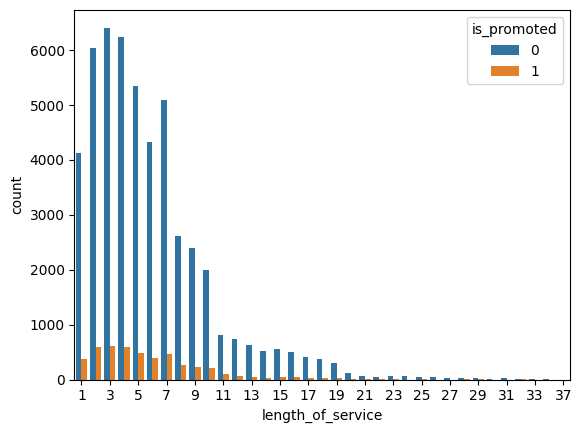

In [ ]:
ax = sns.countplot(x='length_of_service', hue='is_promoted', data=df)
ax.xaxis.set_major_locator(mticker.MultipleLocator(2))

plt.show()

## Reafirmando o dado anterior, pessoas mais velhas, tendem a ser menos promovidas. Pessoas com menos tempo de trabalho, talvez pela idade e pelas oportunidades, são as mais promovidas.

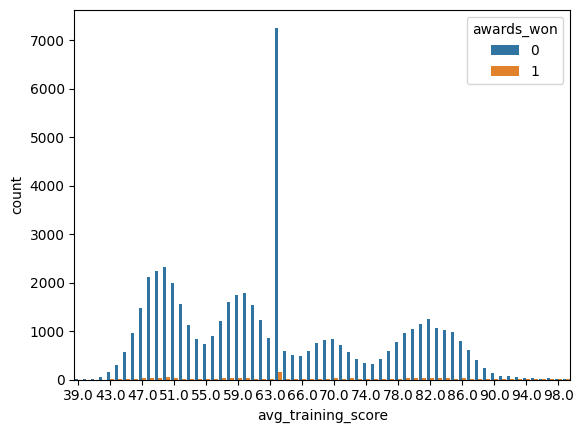

In [ ]:
ax = sns.countplot(x='avg_training_score', hue='awards_won', data=df)
ax.xaxis.set_major_locator(mticker.MultipleLocator(4))

plt.show()

## Plotei o gráfico com a inteção de relacionar aqueles que ganham prêmios e os que recebem promoção. Contudo, não foi possivel fazer afirmações pelo baixo número de pessoas promovidas.

# Categorical encoding

In [ ]:
dataframe_encoded = pd.get_dummies(df['department'], prefix='department')
df[dataframe_encoded.columns] = dataframe_encoded
df = df.drop(columns=['department'])



In [ ]:
df.head()

,employee_id,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,...,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology
0,65438,region_7,Master's & above,f,sourcing,1.0,35,5.0,8,0,...,0,0,0,0,0,0,0,0,1,0
1,65141,region_22,Bachelor's,m,other,1.0,30,5.0,4,0,...,0,0,0,0,0,1,0,0,0,0
2,7513,region_19,Bachelor's,m,sourcing,1.0,34,3.0,7,0,...,0,0,0,0,0,0,0,0,1,0
3,2542,region_23,Bachelor's,m,other,2.0,39,1.0,10,0,...,0,0,0,0,0,0,0,0,1,0
4,48945,region_26,Bachelor's,m,other,1.0,45,3.0,2,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
dataframe_encoded = pd.get_dummies(df['region'], prefix='region')
df[dataframe_encoded.columns] = dataframe_encoded
df = df.drop(columns=['region'])


In [ ]:
dataframe_encoded = pd.get_dummies(df['gender'], prefix='gender')
df[dataframe_encoded.columns] = dataframe_encoded
df = df.drop(columns=['gender'])


In [ ]:
dataframe_encoded = pd.get_dummies(df['recruitment_channel'], prefix='recruitment_channel')
df[dataframe_encoded.columns] = dataframe_encoded
df = df.drop(columns=['recruitment_channel'])


In [ ]:
df.head()

,employee_id,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,department_Analytics,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,Master's & above,1.0,35,5.0,8,0,49.0,0,0,...,0,0,1,0,0,1,0,0,0,1
1,65141,Bachelor's,1.0,30,5.0,4,0,60.0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,7513,Bachelor's,1.0,34,3.0,7,0,50.0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2542,Bachelor's,2.0,39,1.0,10,0,50.0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,48945,Bachelor's,1.0,45,3.0,2,0,73.0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [ ]:
ordem = ['Below Secondary', "Bachelor's", "Master's & above"]
df['education_encoded'] = df['education'].apply(lambda x: ordem.index(x))


In [ ]:
df = df.drop(columns=['education'])


KeyError: ignored

# Normalization

In [ ]:
scaler = StandardScaler()

In [ ]:
df['age'] = scaler.fit_transform(df[['age']])
df['previous_year_rationg'] = scaler.fit_transform(df[['previous_year_rating']])
df['length_of_service'] = scaler.fit_transform(df[['length_of_service']])
df['avg_training_score'] = scaler.fit_transform(df[['avg_training_score']])

In [ ]:
df.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,department_Analytics,department_Finance,...,region_region_7,region_region_8,region_region_9,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,education_encoded,previous_year_rationg
0,65438,1.0,0.022856,5.0,0.498216,0,-1.15690,0,0,0,...,1,0,0,1,0,0,0,1,2,1.378278
1,65141,1.0,-0.630680,5.0,-0.439495,0,-0.28053,0,0,0,...,0,0,0,0,1,1,0,0,1,1.378278
2,7513,1.0,-0.107851,3.0,0.263788,0,-1.07723,0,0,0,...,0,0,0,0,1,0,0,1,1,-0.271462
3,2542,2.0,0.545686,1.0,0.967071,0,-1.07723,0,0,0,...,0,0,0,0,1,1,0,0,1,-1.921202
4,48945,1.0,1.329930,3.0,-0.908351,0,0.75518,0,0,0,...,0,0,0,0,1,1,0,0,1,-0.271462


In [ ]:
df.drop(columns=[' employee_id'])

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,...,region_region_7,region_region_8,region_region_9,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,education_encoded,previous_year_rationg
0,1.0,0.022856,5.0,0.498216,0,-1.15690,0,0,0,0,...,1,0,0,1,0,0,0,1,2,1.378278
1,1.0,-0.630680,5.0,-0.439495,0,-0.28053,0,0,0,0,...,0,0,0,0,1,1,0,0,1,1.378278
2,1.0,-0.107851,3.0,0.263788,0,-1.07723,0,0,0,0,...,0,0,0,0,1,0,0,1,1,-0.271462
3,2.0,0.545686,1.0,0.967071,0,-1.07723,0,0,0,0,...,0,0,0,0,1,1,0,0,1,-1.921202
4,1.0,1.329930,3.0,-0.908351,0,0.75518,0,0,0,0,...,0,0,0,0,1,1,0,0,1,-0.271462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,1.0,1.722052,3.0,2.608065,0,0.00000,0,0,0,0,...,0,0,0,0,1,0,0,1,1,-0.271462
54804,1.0,0.284271,2.0,0.029360,0,-0.59921,0,0,0,0,...,0,0,0,1,0,1,0,0,2,-1.096332
54805,1.0,-1.022802,5.0,-0.673923,0,1.23320,0,1,0,0,...,0,0,0,0,1,1,0,0,1,1.378278
54806,1.0,-0.761388,1.0,-0.908351,0,-1.47558,0,0,0,0,...,0,0,1,0,1,0,0,1,1,-1.921202


# Modelo de predição

In [ ]:
X = df.drop('is_promoted', axis=1)
y = df['is_promoted']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
num_vizinhos = range(1, 21)
acuracias = []
precisions = []
recalls = []

for k in num_vizinhos:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acuracias.append(accuracy)
    precision = precision_score(y_test, y_pred)
    precisions.append(precision)
    recall = recall_score(y_test, y_pred)
    recalls.append(recall)




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

In [ ]:
px.line(x=num_vizinhos, y=acuracias)

## O menor número de K para que a acurácia seja a maior possível é 9.

## Podemos notar que para k>=9, a acurácia permanece constante, com um valor extremamente alto de 0.9137401. Contudo, com essa métrica de avaliação não significa que o modelo é tão eficiente quanto aparenta. O fato da grande maioria dos funcionários não serem elegíveis para promoção, faz com que até mesmo um modelo que mostra que sugere não promoção para 100% dos casos tenha uma boa acurácia.

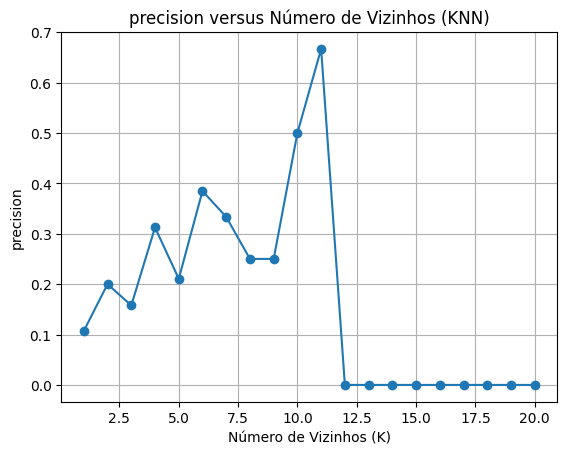

In [ ]:
# Plotar o gráfico de precision versus número de vizinhos
plt.plot(num_vizinhos, precisions, marker='o')
plt.xlabel('Número de Vizinhos (K)')
plt.ylabel('precision')
plt.title('precision versus Número de Vizinhos (KNN)')
plt.grid(True)
plt.show()

# Precisão serve para diminuir os falsos positivos. Podemos ver que a razão entre verdadeiro positivo e falso positivo é muito baixa. Mostrando que tem muito mais falso positivo do que verdadeiro positivo

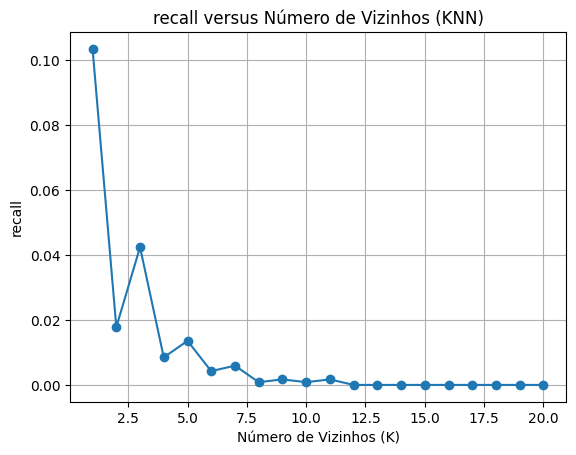

In [ ]:
# Plotar o gráfico de acurácia versus número de vizinhos
plt.plot(num_vizinhos, recalls, marker='o')
plt.xlabel('Número de Vizinhos (K)')
plt.ylabel('recall')
plt.title('recall versus Número de Vizinhos (KNN)')
plt.grid(True)
plt.show()

# Recall serve para diminuir os falsos negativos. Podemos ver que a razão entre verdadeiro positivo e falso negativo é muito baixa. Mostrando que tem muito mais falso negativo do que verdadeiro positivo

# Com a avaliação das duas métricas, notamos que, de fato, há poucos verdadeiros positivos